# Opening a Bar and Restaurant in Bali

In [ ]:
# A description of the problem and a discussion of the background. (15 marks)

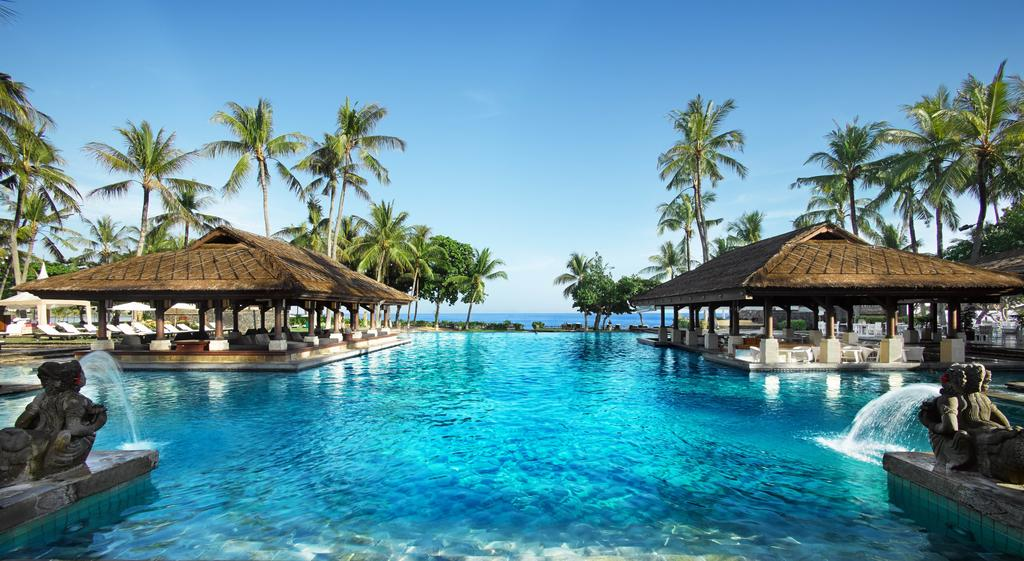

### 1. Introduction
Bali, which has been called the islands of the gods, is one of the most captivating and mesmerizing place to visit. There are many things that you can do in Bali such as: surfing, snorkeling, diving, walking on the endless paddy fields, visiting ancient temples and the monkey forest, witnessing sunrise and sunset at the beautiful beach, etc. 

This report was compiled by the request of an investor who plans to open a Restaurant and Bar in Bali. I am very excited and am going to use the knowledge that I have learnt from IBM-Coursera to help this investor find the most legitimate place for his new bussiness.

### Business Problem
As per the investor request, the location must be in prime area, close to the major hotels or villas strip, preferably located near the beach as he and his family are very fond of surfing.

### Target Audience
Bali is one of the hottest holiday destinations in the world. This report is prepared for investors or anyone who are looking forward to pursue food and beverages bussinesses in Bali. Hopefully, this report will provide a better clarity and help investors in making informed decisions. 

In [ ]:
# A description of the data and how it will be used to solve the problem. (15 marks)

### 2. Data Section

Description of the data and its sources that will be used to solve the problem
Description of the Data:
The following data is required to answer the issues of the problem:

List of Hotels and their geodata (latitude and longitude)
List of Villas and their geodata (latitude and longitude)
List of venues in Bali

How the data will be used to solve the problem
The data will be used as follows:

Use Foursquare and geopy data to map top 100 venues in the islands of Bali.
Use foursquare and geopy data to map the location of hotels, villas, and tourist attractions in the islands. 
There are only several beaches options to choose from. Focus on each one of them and compare between each other.

The procesing of these DATA will allow to answer the key questions to make a decision:

How venues distribute among the districts in Bali?
Are there any particular pattern as to where bussinesses concentrate? 
Any other interesting statistical data findings of the real estate and overall data?


In [1]:
# Install packages
!conda install -c conda-forge geopy --yes 
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



In [2]:
import random # library for random number generation


from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

import folium # plotting library

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')
print('Folium installed')
print('Libraries imported.')

Libraries imported.
Folium installed
Libraries imported.


In [3]:
# Kuta beach, Bali
address = 'kuta, bali'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bali island are {}, {}.'.format(latitude, longitude))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


The geograpical coordinate of Bali island are -8.7263055, 115.177551844638.


In [4]:
neighborhood_latitude= -8.7263055
neighborhood_longitude= 115.177551844638

#### Initialize credentials to pull data from Foursquare

In [5]:
CLIENT_ID = 'YLYZEFGLPI1QNQCLC0K55FYJ0CL23LKXMCAU0EWT4Z2GNDNH' # your Foursquare ID
CLIENT_SECRET = 'VJBDCHXZ1QPLXRGSGEPNLTGNCYLGEFZYQBFU52ZCBMZEFOOZ' # your Foursquare Secret
VERSION = '20190821'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YLYZEFGLPI1QNQCLC0K55FYJ0CL23LKXMCAU0EWT4Z2GNDNH
CLIENT_SECRET:VJBDCHXZ1QPLXRGSGEPNLTGNCYLGEFZYQBFU52ZCBMZEFOOZ


#### Pull Kuta beach neighbourhood datas from foursquare

In [6]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 2000 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=YLYZEFGLPI1QNQCLC0K55FYJ0CL23LKXMCAU0EWT4Z2GNDNH&client_secret=VJBDCHXZ1QPLXRGSGEPNLTGNCYLGEFZYQBFU52ZCBMZEFOOZ&v=20190821&ll=-8.7263055,115.177551844638&radius=2000&limit=100'

In [7]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d6791012b274a002cd2bce2'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Kuta',
  'headerFullLocation': 'Kuta',
  'headerLocationGranularity': 'city',
  'totalResults': 242,
  'suggestedBounds': {'ne': {'lat': -8.708305481999982,
    'lng': 115.19572866328772},
   'sw': {'lat': -8.744305518000019, 'lng': 115.15937502598828}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bf8a5fe4a67c9288ed625cf',
       'name': 'Warung Satria Masakan Bali',
       'location': {'address': 'Jl. Kendedes',
        'lat': -8.726950715997377,
        'lng': 115.17788986701783,
        'labeledLatLngs': [{'label': 'display',
          'lat': -8.726950715997377,


In [8]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [9]:
venues = results['response']['groups'][0]['items']
    
BLnearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
BLnearby_venues =BLnearby_venues.loc[:, filtered_columns]

# filter the category for each row
BLnearby_venues['venue.categories'] = BLnearby_venues.apply(get_category_type, axis=1)

# clean columns
BLnearby_venues.columns = [col.split(".")[-1] for col in BLnearby_venues.columns]

BLnearby_venues.head()


,name,categories,lat,lng
0,Warung Satria Masakan Bali,Asian Restaurant,-8.726951,115.177890
1,Young Spa,Spa,-8.722417,115.175280
2,Bubur Ayam Jakarta Pasar Kuta,Indonesian Restaurant,-8.722427,115.176905
3,Warung Makan Nikmat,Indonesian Restaurant,-8.725851,115.174607
4,Cara Cara Inn,Hotel,-8.722761,115.173320


In [10]:
# create map of Bali place using latitude and longitude values
map_bl = folium.Map(location=[latitude, longitude], zoom_start=20)

# add markers to map
for lat, lng, label in zip(BLnearby_venues['lat'], BLnearby_venues['lng'], BLnearby_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#0f0f0f',
        fill_opacity=0.7,
    ).add_to(map_bl)  
    
map_bl

In [11]:
BLnearby_venues.shape

(100, 4)

# Part 2

In part 2, we will determine which location is the most suitable to open a Bar and Restaurant. 

Some of the criterias that we will use are:
1. Location must be near the beach
2. We will check the diversity of the businesses of each of the beaches
3. We will then choose the area with the least amount of restaurant nearby but has high businesses diversity which means the place is vibrant and lively for doing business, as more tourist would visit the place

There are only a few beaches in Bali and they are:
1. Kuta beach (The one we did on part 1)
2. Nusa Dua beach
3. Tanjung Benoa beach
4. Pandawa beach

The referrence I use is just by picking one beach at a time from google map. 

# Capture Neighbourhood in Nusa Dua Beach

In [12]:
# Nusa Dua beach, Bali
address = 'nusa dua, bali'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bali island are {}, {}.'.format(latitude, longitude))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


The geograpical coordinate of Bali island are -8.8016122, 115.2239813.


In [13]:
neighborhood_latitude= -8.8016122
neighborhood_longitude= 115.2239813

In [14]:
# Capture the neighbourhood of nusa dua
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 2000 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=YLYZEFGLPI1QNQCLC0K55FYJ0CL23LKXMCAU0EWT4Z2GNDNH&client_secret=VJBDCHXZ1QPLXRGSGEPNLTGNCYLGEFZYQBFU52ZCBMZEFOOZ&v=20190821&ll=-8.8016122,115.2239813&radius=2000&limit=100'

In [15]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d679161cad1b6002c0edce1'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Tanjung Benoa',
  'headerFullLocation': 'Tanjung Benoa',
  'headerLocationGranularity': 'city',
  'totalResults': 130,
  'suggestedBounds': {'ne': {'lat': -8.783612181999981,
    'lng': 115.24216180211228},
   'sw': {'lat': -8.819612218000017, 'lng': 115.20580079788773}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c86f42256e037047ee3aea3',
       'name': 'Babi Guling Pak Dobiel',
       'location': {'address': 'Jalan Srikandi No. 9',
        'lat': -8.800780768337086,
        'lng': 115.22278080038362,
        'labeledLatLngs': [{'label': 'display',
          'lat'

In [16]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [17]:
venues = results['response']['groups'][0]['items']
    
NDnearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
NDnearby_venues =NDnearby_venues.loc[:, filtered_columns]

# filter the category for each row
NDnearby_venues['venue.categories'] = NDnearby_venues.apply(get_category_type, axis=1)

# clean columns
NDnearby_venues.columns = [col.split(".")[-1] for col in NDnearby_venues.columns]

NDnearby_venues.head()


,name,categories,lat,lng
0,Babi Guling Pak Dobiel,BBQ Joint,-8.800781,115.222781
1,Secret Cafe,Café,-8.804840,115.220390
2,Sensatia Botanicals - Bali Collection Nusa Dua,Cosmetics Shop,-8.802297,115.229535
3,Courtyard Bali Nusa Dua Resort,Hotel,-8.807098,115.226160
4,Pepito Express,Convenience Store,-8.799882,115.217544


In [18]:
NDnearby_venues.shape

(100, 4)

In [19]:
# create map of Bali place using latitude and longitude values
map_nd = folium.Map(location=[latitude, longitude], zoom_start=20)

# add markers to map
for lat, lng, label in zip(NDnearby_venues['lat'], NDnearby_venues['lng'], NDnearby_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#0f0f0f',
        fill_opacity=0.7,
    ).add_to(map_nd)  
    
map_nd

# Capture Neighbourhood in Pandawa Beach

In [20]:
# Pandawa beach, Bali
address = 'pandawa beach, bali'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bali island are {}, {}.'.format(latitude, longitude))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


The geograpical coordinate of Bali island are -8.84580465, 115.185087560473.


In [21]:
neighborhood_latitude= -8.84580465
neighborhood_longitude= 115.185087560473

In [22]:
# Capture the neighbourhood of nusa dua
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 2000 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=YLYZEFGLPI1QNQCLC0K55FYJ0CL23LKXMCAU0EWT4Z2GNDNH&client_secret=VJBDCHXZ1QPLXRGSGEPNLTGNCYLGEFZYQBFU52ZCBMZEFOOZ&v=20190821&ll=-8.84580465,115.185087560473&radius=2000&limit=100'

In [23]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d679199d9a6e600383a0ed7'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 9,
  'suggestedBounds': {'ne': {'lat': -8.827804631999982,
    'lng': 115.20327023948462},
   'sw': {'lat': -8.863804668000018, 'lng': 115.16690488146136}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e66532cb3ad9b56d0d936df',
       'name': 'Pantai Pandawa',
       'location': {'address': 'Desa Kutuh',
        'crossStreet': 'Ungasan',
        'lat': -8.845491437761666,
        'lng': 115.18582195043564,
        'labeledLatLngs': [{'label': 'di

In [24]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [25]:
venues = results['response']['groups'][0]['items']
    
PDnearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
PDnearby_venues = PDnearby_venues.loc[:, filtered_columns]

# filter the category for each row
PDnearby_venues['venue.categories'] = PDnearby_venues.apply(get_category_type, axis=1)

# clean columns
PDnearby_venues.columns = [col.split(".")[-1] for col in PDnearby_venues.columns]

PDnearby_venues.head()


,name,categories,lat,lng
0,Pantai Pandawa,Beach,-8.845491,115.185822
1,Pandawa Cliff Estate,Resort,-8.845232,115.182146
2,BVLGARI Resort Bali,Hotel,-8.844000,115.167900
3,Greenbowl Beach,Beach,-8.848059,115.169251
4,Pantai Gunung Payung,Beach,-8.839945,115.200723


In [26]:
PDnearby_venues.shape

(9, 4)

In [27]:
# create map of Bali place using latitude and longitude values
map_pd = folium.Map(location=[latitude, longitude], zoom_start=20)

# add markers to map
for lat, lng, label in zip(PDnearby_venues['lat'], PDnearby_venues['lng'], PDnearby_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='#0f0f0f',
        fill_opacity=0.7,
    ).add_to(map_pd)  
    
map_pd

# As we can see that there is not much things happening here in Pandawa beach, we will proceed to drop Pandawa beach as an option altogether. 

# Finally, capture Neighbourhood in Tanjung Benoa Beach

In [28]:
# Tanjung Benoa beach, Bali
address = 'tanjung benoa, bali'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bali island are {}, {}.'.format(latitude, longitude))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


The geograpical coordinate of Bali island are -8.76573985, 115.223256233378.


In [29]:
neighborhood_latitude= -8.76573985
neighborhood_longitude= 115.223256233378

In [30]:
# Capture the neighbourhood of nusa dua
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 2000 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=YLYZEFGLPI1QNQCLC0K55FYJ0CL23LKXMCAU0EWT4Z2GNDNH&client_secret=VJBDCHXZ1QPLXRGSGEPNLTGNCYLGEFZYQBFU52ZCBMZEFOOZ&v=20190821&ll=-8.76573985,115.223256233378&radius=2000&limit=100'

In [31]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d6791dfcad1b6002c12bd9f'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Tanjung Benoa',
  'headerFullLocation': 'Tanjung Benoa',
  'headerLocationGranularity': 'city',
  'totalResults': 85,
  'suggestedBounds': {'ne': {'lat': -8.747739831999981,
    'lng': 115.2414349767698},
   'sw': {'lat': -8.783739868000017, 'lng': 115.2050774899862}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '502c9b20e4b078fb582ef70d',
       'name': 'Private Beach, Novotel Benoa Bali',
       'location': {'address': 'Jalan Pratama',
        'lat': -8.764398742739871,
        'lng': 115.2232497993995,
        'labeledLatLngs': [{'label': 'display',
          'lat'

In [32]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [33]:
venues = results['response']['groups'][0]['items']
    
TBnearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
TBnearby_venues = TBnearby_venues.loc[:, filtered_columns]

# filter the category for each row
TBnearby_venues['venue.categories'] = TBnearby_venues.apply(get_category_type, axis=1)

# clean columns
TBnearby_venues.columns = [col.split(".")[-1] for col in TBnearby_venues.columns]

TBnearby_venues.head()


,name,categories,lat,lng
0,"Private Beach, Novotel Benoa Bali",Beach,-8.764399,115.223250
1,Uluwatu Restaurant Novotel Bali Benoa,Restaurant,-8.764289,115.222924
2,Novotel Benoa Bali,Resort,-8.764350,115.221999
3,"Mantra Sakala, Bali",Resort,-8.759433,115.221325
4,Sakala Bali,French Restaurant,-8.759408,115.222353


In [34]:
TBnearby_venues.shape

(85, 4)

In [35]:
# create map of Bali place using latitude and longitude values
map_tb = folium.Map(location=[latitude, longitude], zoom_start=20)

# add markers to map
for lat, lng, label in zip(TBnearby_venues['lat'], TBnearby_venues['lng'], TBnearby_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#0f0f0f',
        fill_opacity=0.7,
    ).add_to(map_tb)  
    
map_tb

# PART 3 Data Analysis

In this final part, we will analyze and compare each site. 
The 3 beaches are:
1. Kuta beach
2. Nusa Dua beach
3. Tanjung Benoa beach
4. Pandawa beach (dropped from our desired list due to too little available datapoints on this particular site, perhaps this place is not too happening for tourists)

In [36]:
# Add Beach name to each Dataframe
BLnearby_venues['Location'] = 'Kuta'
NDnearby_venues['Location'] = 'Nusa Dua'
TBnearby_venues['Location'] = 'Tanjung Benoa'

### Let's find out how many unique categories in each sites. The more unique value means the more vibrant, diverse, and lively the neighbourhood is.

In [37]:
# lets find out how many unique categories on each sites
print('There are {} uniques categories in Kuta beach.'.format(len(BLnearby_venues['categories'].unique())))
print('There are {} uniques categories in Nusa Dua beach.'.format(len(NDnearby_venues['categories'].unique())))
print('There are {} uniques categories in Tanjung Benoa beach.'.format(len(TBnearby_venues['categories'].unique())))

There are 52 uniques categories in Kuta beach.
There are 38 uniques categories in Nusa Dua beach.
There are 37 uniques categories in Tanjung Benoa beach.


In [38]:
# one hot encoding for 3 dataframes
kuta_onehot = pd.get_dummies(BLnearby_venues[['categories']], prefix="", prefix_sep="")
nusadua_onehot = pd.get_dummies(NDnearby_venues[['categories']], prefix="", prefix_sep="")
tanjung_onehot = pd.get_dummies(TBnearby_venues[['categories']], prefix="", prefix_sep="")

# add Location column to dataframe
kuta_onehot['location'] = 'Kuta beach'
nusadua_onehot['location'] = 'Nusa Dua beach'
tanjung_onehot['location'] = 'Tanjung Benoa beach'

In [39]:
kuta_onehot.tail()

,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Balinese Restaurant,Bar,Beach,Brazilian Restaurant,Bubble Tea Shop,Café,Candy Store,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Dessert Shop,Diner,Fast Food Restaurant,Food Court,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Hostel,Hotel,Ice Cream Shop,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Javanese Restaurant,Korean Restaurant,Lounge,Massage Studio,Mexican Restaurant,Movie Theater,Multiplex,Nightclub,Pizza Place,Resort,Restaurant,Seafood Restaurant,Shoe Store,Shopping Mall,Souvenir Shop,Spa,Sporting Goods Shop,Surf Spot,Sushi Restaurant,Swiss Restaurant,Taco Place,Udon Restaurant,Water Park,Women's Store,location
95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Kuta beach
96,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Kuta beach
97,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Kuta beach
98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Kuta beach
99,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Kuta beach


In [40]:
kuta_onehot.shape

(100, 53)

### Now, we use groupby method to "categories" and calculate the means of each occurances.

In [41]:
# Find the means of each columns on Kuta beach
kuta_grouped = kuta_onehot.groupby('location').mean().transpose()
kuta_grouped = kuta_grouped.sort_values('Kuta beach', ascending=False)
kuta_grouped

location,Kuta beach
Hotel,0.12
Spa,0.07
Coffee Shop,0.07
Clothing Store,0.07
Shopping Mall,0.04
Italian Restaurant,0.03
Indonesian Restaurant,0.03
BBQ Joint,0.03
Hostel,0.02
Fast Food Restaurant,0.02


In [42]:
# Find the means of each columns on Nusa Dua beach
nusadua_grouped = nusadua_onehot.groupby('location').mean().transpose()
nusadua_grouped = nusadua_grouped.sort_values('Nusa Dua beach', ascending=False)
nusadua_grouped

location,Nusa Dua beach
Resort,0.13
Beach,0.11
Hotel,0.11
Lounge,0.04
Restaurant,0.04
Spa,0.04
Asian Restaurant,0.03
Indonesian Restaurant,0.03
Hotel Bar,0.03
Japanese Restaurant,0.03


In [43]:
# Find the means of each columns on Tanjung Benoa beach
tanjung_grouped = tanjung_onehot.groupby('location').mean().transpose()
tanjung_grouped = tanjung_grouped.sort_values('Tanjung Benoa beach', ascending=False)
tanjung_grouped

location,Tanjung Benoa beach
Resort,0.141176
Hotel,0.094118
Water Park,0.082353
Beach,0.082353
Restaurant,0.058824
Surf Spot,0.047059
Spa,0.035294
Indonesian Restaurant,0.035294
Dive Spot,0.023529
Lounge,0.023529


### Recall our criterias to choose the location
Some of the criterias that we will use are:
1. Location must be near the beach (All 3 sites are located by the beach)
2. We will check the diversity of the businesses of each of the beaches 
3. We will then choose the area with the least amount of Bars nearby but has high businesses diversity which means the place is vibrant and lively for doing business, as more tourist would visit the place

In [44]:
# 2 Check the diversity of the businesses in each sites
# lets find out how many unique categories on each sites
print('There are {} uniques categories in Kuta beach.'.format(len(BLnearby_venues['categories'].unique())))
print('There are {} uniques categories in Nusa Dua beach.'.format(len(NDnearby_venues['categories'].unique())))
print('There are {} uniques categories in Tanjung Benoa beach.'.format(len(TBnearby_venues['categories'].unique())))

There are 52 uniques categories in Kuta beach.
There are 38 uniques categories in Nusa Dua beach.
There are 37 uniques categories in Tanjung Benoa beach.


In [45]:
# 3 Check the means number of bars in each sites
kuta_grouped.reset_index(inplace=True)
nusadua_grouped.reset_index(inplace=True)
tanjung_grouped.reset_index(inplace=True)

In [46]:
# Merging Nusa dua and Tanjung Benua data frames
nusadua_tanjung = pd.merge(nusadua_grouped, tanjung_grouped, how='outer', on='index')

In [47]:
# Merging nusadua_tanjung and Kuta data frames. 
merge_all = pd.merge(nusadua_tanjung, kuta_grouped, how='outer', on='index')

In [48]:
# Show the merged data frame
merge_all.sort_values('index')

location,index,Nusa Dua beach,Tanjung Benoa beach,Kuta beach
41,American Restaurant,NaN,0.023529,0.01
6,Asian Restaurant,0.03,0.023529,0.02
28,BBQ Joint,0.01,0.011765,0.03
58,Bakery,NaN,NaN,0.02
18,Balinese Restaurant,0.02,0.011765,0.01
36,Bar,0.01,0.023529,0.01
1,Beach,0.11,0.082353,0.02
17,Beach Bar,0.02,0.023529,NaN
45,Bed & Breakfast,NaN,0.011765,NaN
72,Brazilian Restaurant,NaN,NaN,0.01


In [49]:
# Picked only food related datas
merge_all_food = merge_all.loc[[36,17,8,11,41,6,28,18,45,72,16,73,15,12,48,31,46,53,75,76,52,77,25,7,13,9,79,80,26,64,4,14,20,22,66,67,42,68]]
merge_all_food

location,index,Nusa Dua beach,Tanjung Benoa beach,Kuta beach
36,Bar,0.01,0.023529,0.01
17,Beach Bar,0.02,0.023529,NaN
8,Hotel Bar,0.03,NaN,NaN
11,Cocktail Bar,0.03,NaN,0.01
41,American Restaurant,NaN,0.023529,0.01
6,Asian Restaurant,0.03,0.023529,0.02
28,BBQ Joint,0.01,0.011765,0.03
18,Balinese Restaurant,0.02,0.011765,0.01
45,Bed & Breakfast,NaN,0.011765,NaN
72,Brazilian Restaurant,NaN,NaN,0.01


In [50]:
# Find the most diverse type of food business in each sites
merge_all_food.describe()

location,Nusa Dua beach,Tanjung Benoa beach,Kuta beach
count,20.000000,20.000000,27.000000
mean,0.020500,0.017647,0.014074
std,0.009445,0.011765,0.006939
min,0.010000,0.011765,0.010000
25%,0.010000,0.011765,0.010000
50%,0.020000,0.011765,0.010000
75%,0.030000,0.023529,0.020000
max,0.040000,0.058824,0.030000


In [51]:
# Sum the total value
merge_all_food.sum()

location
index                  BarBeach BarHotel BarCocktail BarAmerican Rest...
Nusa Dua beach                                                      0.41
Tanjung Benoa beach                                             0.352941
Kuta beach                                                          0.38
dtype: object

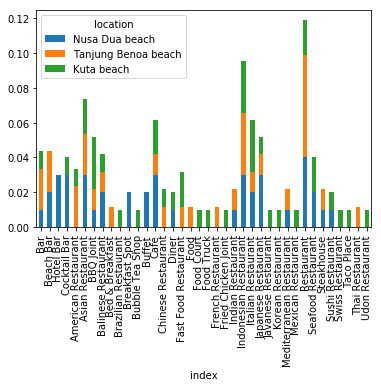

In [52]:
merge_all_food.plot.bar(x='index', stacked=True)

# Conclusion

In the beginning, I take 4 beahches in Bali for considerations, they are:
1. Kuta beach
2. Nusa Dua beach
3. Tanjung Benoa beach
4. Pandawa beach (dropped)

Pandawa beach analysis: I proceed to drop Pandawa beach upon pulling the datas from Foursquare because there were too few of venues there. This is an indication that the place is not on the same league as the other three. 

Nusa Dua beach analysis: There are 38 unique types of businesses in Nusa Dua area. 41% of them are food related businesses. This would seem to be saturated market to open a new Bar/Restaurant in the area as it also means the competition is very high in the area. 

Tanjung Benoa beach analysis: There are 37 unique types of businesses in Tanjung Benoa area. Approximately 35% of them are food related business. 

Kuta beach analysis: There are 52 unique types of businesses in Kuta area, this by far is the most diverse amongst all the other beaches (many choice of restaurants). Approximately 38% of them are food related business which means there are still rooms to grow and less competition compared to Nusa Dua beach(41% of 38 unique types). Another obvious indicator is the category "Beach Bar", as we can see that Kuta beach does not currently has any beach bar yet and this is one requirement by the investor. It is clear that I should recommend Kuta area to my investor. 

### Winner: Kuta beach

# Thank you
